[View in Colaboratory](https://colab.research.google.com/github/saranyamandava/Lambda-School-DataScience/blob/master/Week6_Regression_Coding_Challenge.ipynb)

# Linear Regression by Hand

In this challenge we'll be doing a linear fit with just one input variable and one output. We'll assume that our data can be modeled way using the function y = ax + b for some values of a and b. Your job is to find the best values of a and b, the ones that make our model best fit the data. First, let's import the libraries we'll need.

In [0]:
# LAMBDA SCHOOL
# 
# MACHINE LEARNING
#
# MIT LICENSE

import numpy as np
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt

Now let's grab the data. This is a fictional data set made for the purpose of this exercise.

In [0]:
url="https://raw.githubusercontent.com/mathewphilipc/LambdaDataSets/master/linear_data.csv"
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')))

Your first job is to visit that URL and poke around in the data. However you wish to do so, store the first column as a vector x and store the second column as a vector y. We'll think of x as the input and y as the output.

In [0]:
# You do: x and y
x = data['x']
#print (x)
y = data['y']

We also like to start by getting a sense of this data, so next let's make a scatterplot.

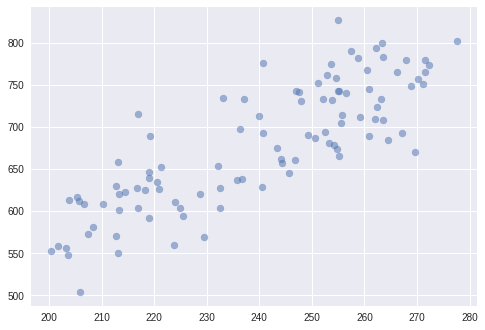

In [72]:
plt.scatter(x, y, alpha=0.5)

Now here's the fun part: whenever we model data like this using a function f(x), we like to compute the "SSE", or "sum of squared errors."

This means that, for every input number x_i, we calculate both the actual corresponding output y_i and the output the model predicts, which is f(x_i).

We can quantify how badly the model did at predicting that point by calculating the square of the difference between the two: error_i = (y_i - f(x_i))^2.

Then we can quantify how badly the model did at all points by computing that squared difference for every indidividual point and adding them all up. Remember bigger = worse here.

Calculate the SSE (call it particular_SSE) we would get if we used the linear model f(x) = ax + b with a = 20 and b = 70.

In [0]:
# What is SSE for a = 20, b = 70?
a = 20
b = 70


Now here's the really fun part: write a function error(a,b) that takes in the numbers a and b as inputs and calculates the SSE we would get using the model f(x) = ax + b.

In [74]:

def error(a,b):
  sse = 0
  
  for i in range(len(x)):
    df = a*x[i]+b
    sse = sse + (y[i]-df)**2
  return sse 

#a = 20 and b = 70.
print (error(a,b))    

1767473752.713384


Earlier we calculated error(a,b) when a = 20 and b = 70. What happens to the error if you replace that with a = 21? Does the error go up or down? What about if we replace a = 20 with a = 19 instead? What if we start tweaking b as well? However you want to do so, tweak a and b to make the SSE as small as possible. Report back with the a and b that you find and the corresponding SSE.

In [75]:
# a, b, SSE? How'd you get it?
#a = 21 and b =70
print (error(21,70))

#a=21 and b=19
print (error(20,19))

1975730995.132117
1725021850.2388513


In [76]:
# a =1 and b =1
print (error(1,1))

# a =1 and b =0
print (error(1,0))

19517701.62474722
19605442.751225255


In [77]:
#a =1 and b = 70
print (error(1,70))

13946563.897762377


In [78]:
#a =2 and b = 90
print (error(2,90))

1390238.2529853326


As the value of b increases and a decreases, sse value decreases.Let's plot a graph with a range of values for x and y. \\
with lower range of values for a and b fixed as 70.

[12500067.33513921  6662683.98078922  2680762.03034684   554301.48381207
   283302.34118492  1867764.60246539  5307688.26765348 10603073.33674917
 17753919.80975249 26760227.68666342 37621996.96748196]


Text(0,0.5,'errors')

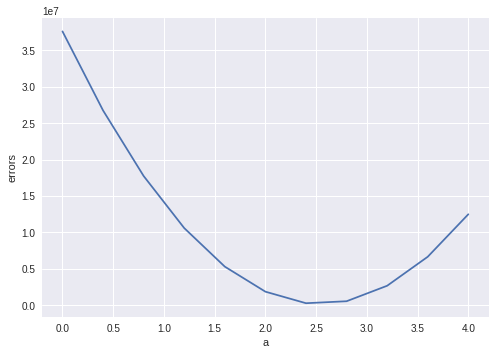

In [93]:
from mpl_toolkits import mplot3d
a_range = np.linspace(4,0,11)
b_range = np.ones(11)*70

Z = error(a_range,b_range)
print (Z)

plt.plot(a_range,Z)
plt.xlabel("a")
plt.ylabel("errors")

Now from the above graph, the best guess for a would be around 2.4

Now lets lock a and do the same with b.

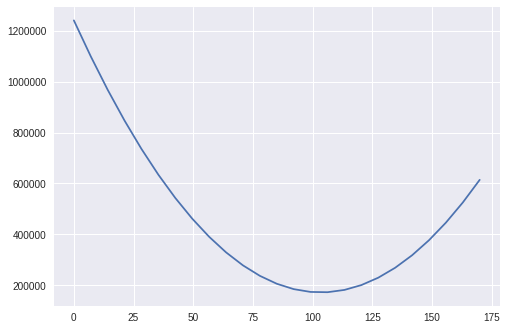

In [87]:
a = 2.4
range_b = np.linspace(0,170,25)
fixed_a = np.ones(25)*2.4
b_errors = error(fixed_a,range_b)
plt.plot(range_b,b_errors)

Learned that ~110 is optimum b, try again in a smaller range

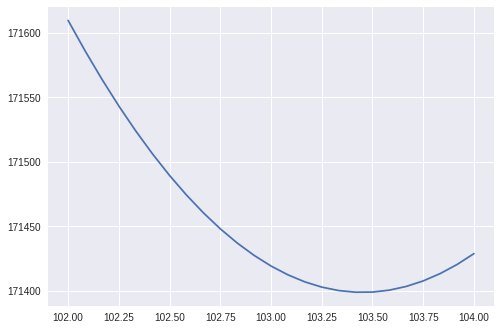

In [88]:
range_b = np.linspace(102,104,25)
fixed_a = np.ones(25)*2.4
b_errors = error(fixed_a,range_b)
plt.plot(range_b,b_errors)

Best b is 103.5

2.4 70
a: 2.7989721142102573
b: 7.768863081775258
error: 163955.77637317328


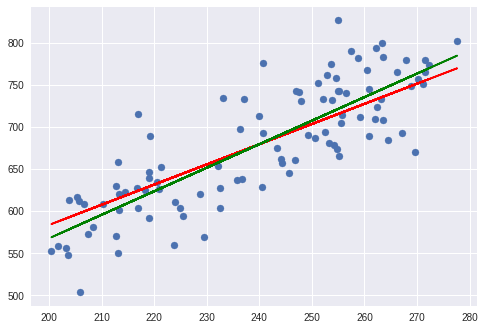

In [92]:
plt.scatter(x,y)
print(a,b)
plt.plot(x,x*a+103.5,'r')
solution = np.polyfit(x,y,1)
plt.plot(x,solution[0]*x+solution[1],'g')
print ("a:",solution[0])
print ("b:",solution[1])
print ("error:", error(solution[0],solution[1]))